# Figure 3b. Distribution of the number of 95% CoSs corresponding to the different numbers of colocalized traits per locus.

Distribution of the number of 95% CoS corresponding to the different numbers of colocalized traits per locus; we omit from consideration 0.55% loci with more than 10 colocalized traits. 

In [2]:
library(tidyverse)
library(ggpattern)
library(ggpubr)
library(cowplot)
res <- readRDS("data/xQTL_only_colocalization.rds")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend


The following object is masked from ‘package:lubridate’:

    stamp




## Organize input data

In [3]:
coloc_pheno_numbers <- sapply(res$colocalized_phenotypes, function(cp){
  length(strsplit(cp, "; ")[[1]])
})
table_numphen <- table(coloc_pheno_numbers)
data <- data.frame(num_phen = as.numeric(table_numphen),
                   categories = names(table_numphen))
data$proportion <- data$num_phen / sum(data$num_phen)
prop_10 <- sum(data$proportion[10:13])
num_10 <- sum(data$num_phen[10:13])
data <- data[1:9,]
data <- rbind(data, c(num_10, ">10", prop_10))
data <- within(data, {
  categories <- factor(categories, levels = c(2,3,4,5,6,7,8,9,10,">10"))
  num_phen <- as.numeric(num_phen)
  proportion <- as.numeric(proportion)
})

# Distribution plot

In [4]:
library(ggsci)
color <- c(pal_npg()(10), pal_d3()(10))
p1 <- ggplot(data, aes(x = categories, y = num_phen, fill = categories)) +
  geom_bar(stat = "identity") +
  scale_color_manual(values = color) +
  labs(
    title = "",
    x = "Number of colocalized phenotypes",
    y = "Number of CoS"
  ) +
  theme_minimal(base_size = 15) + # Use a minimal theme with a larger base font size
  theme(
    plot.title = element_text( size = 0 ),
    axis.title.x = element_text( margin = margin(t = 10), size = 24), # Adjust x axis title margin
    axis.title.y = element_text(margin = margin(r = 10), size = 24), # Adjust y axis title margin
    axis.text.x = element_text(margin = margin(t = 5), size = 18), # Adjust x axis text margin
    axis.text.y = element_text(margin = margin(r = 5), size = 18), # Adjust y axis text margin
    legend.position = "none",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)
  )

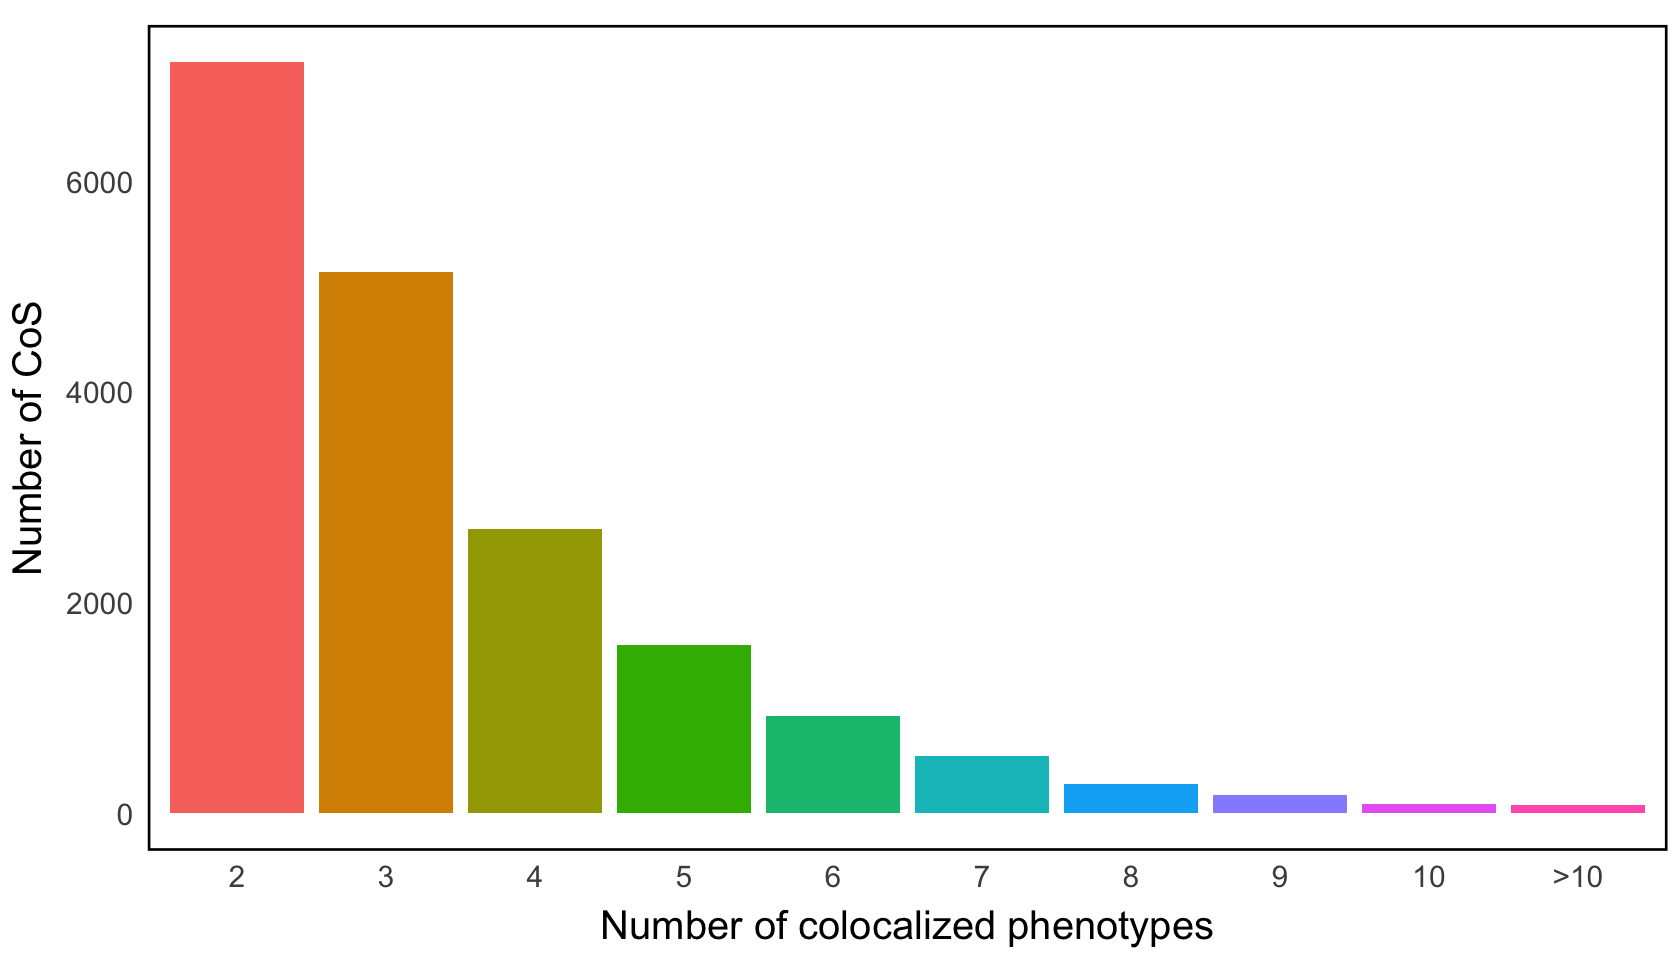

In [5]:
options(repr.plot.width = 14, repr.plot.height = 8)
p1